1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [2]:
df = pd.read_csv('data/usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


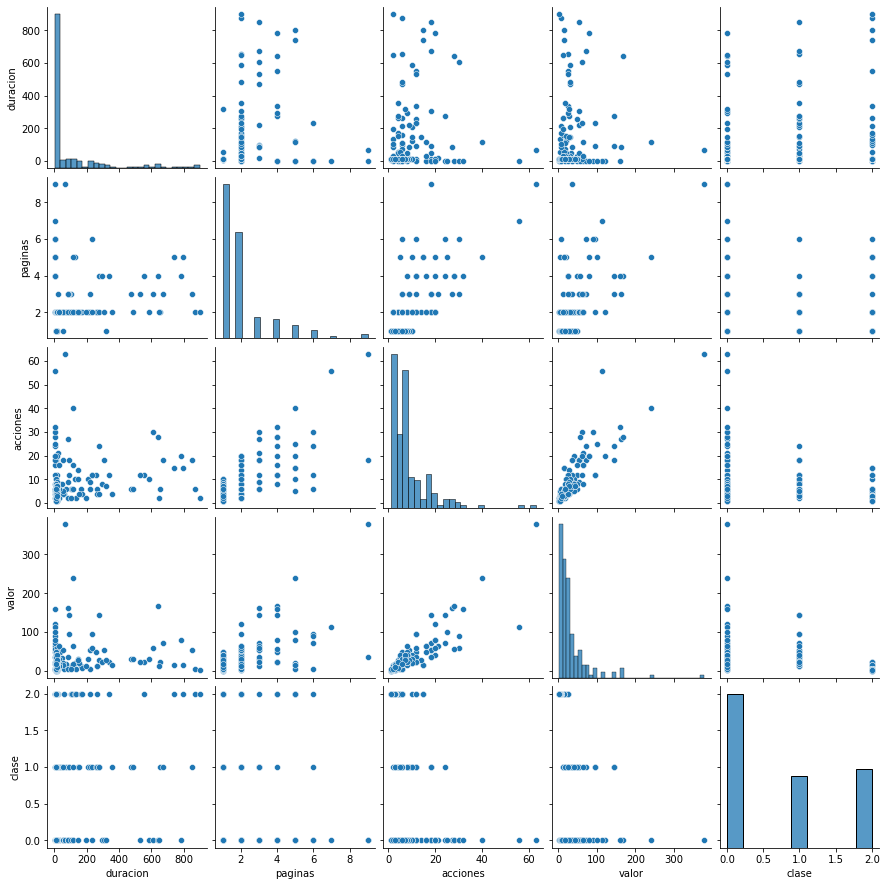

In [4]:
sns.pairplot(df);

In [8]:
X = df.drop('duracion', axis=1)
y = df['duracion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)
predictions

array([ 37.61742438,  91.34160589, 130.58655995, 129.34486954,
        58.67150788,  23.30272389,  18.23520983,  37.61742438,
        53.24108984,  39.3715568 , 154.3723755 ,  58.67150788,
        92.59984602,  66.80211934,  57.68641378, 623.497578  ,
       139.95773278,  34.00054046,  85.0918031 ,  79.5941105 ,
       110.11930907, 236.79054271, 109.59706118,  77.39999367,
       266.91979121, 184.21079922, 152.94847939,  30.5151374 ,
        27.10181353, 188.55618093,  83.16177704,  54.05934556,
        18.8397212 , 130.58655995])

In [10]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[21.13634697 12.87425465 -2.04495721 46.67111192]
-16.379903159773306


C:\Users\artur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


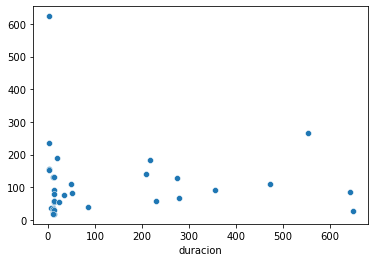

In [11]:
sns.scatterplot(y_test, predictions);

C:\Users\artur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


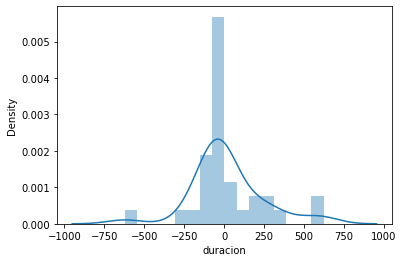

In [12]:
sns.distplot(y_test - predictions);

In [14]:
print(lin_reg.score(X_train, y_train))
print(lin_reg.score(X_test, y_test))

0.14813704890209378
-0.317594520086516


In [15]:
print('RMSE', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE 220.65573239823075


In [16]:
corr_matrix = df.corr()
corr_matrix

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


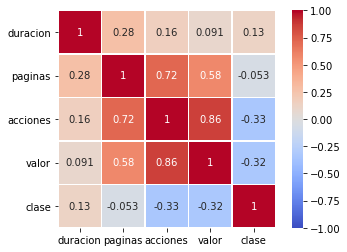

In [22]:
sns.heatmap(corr_matrix,
           vmin = -1,
           vmax = 1,
           cmap=sns.color_palette("coolwarm", as_cmap=True),
           square = True,
           linewidths = 0.5,
           annot=True);